In [1]:
#original code
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [44]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

In [3]:
from sklearn.model_selection import train_test_split , cross_val_score , GridSearchCV , KFold
from sklearn.feature_selection import SelectFromModel
from sklearn.preprocessing import PolynomialFeatures

In [66]:
from sklearn.metrics import classification_report , accuracy_score , precision_score , recall_score , f1_score

In [5]:
sns.set_style('darkgrid')
matplotlib.rcParams['figure.figsize'] = (10 , 6)

# Data preparation and cleaning

In [6]:
#loading data
iris = pd.read_csv('./iris.csv')

In [7]:
iris.shape

(150, 5)

In [8]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal.length  150 non-null    float64
 1   sepal.width   150 non-null    float64
 2   petal.length  150 non-null    float64
 3   petal.width   150 non-null    float64
 4   variety       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [9]:
iris.isna().sum()

sepal.length    0
sepal.width     0
petal.length    0
petal.width     0
variety         0
dtype: int64

From the above information, we can see that there are no null values on any rows in the dataset, therefore we have nothing to clean in the dataset.

In [10]:
#viewing statistical relationships between numerical features 
iris.describe()

,sepal.length,sepal.width,petal.length,petal.width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


## Exploratory Data Analysis and Visualisations

In [11]:
iris['variety'].value_counts()

Setosa        50
Virginica     50
Versicolor    50
Name: variety, dtype: int64

In [12]:
iris.columns

Index(['sepal.length', 'sepal.width', 'petal.length', 'petal.width',
       'variety'],
      dtype='object')

In [13]:
def plot_variety_hist(variety , bins=0):
    feature_df = iris.loc[iris.variety == variety]
    feature_df.hist()
    plt.suptitle('Visualizing histograms for the {} variety'.format(variety)  ,fontsize=20);

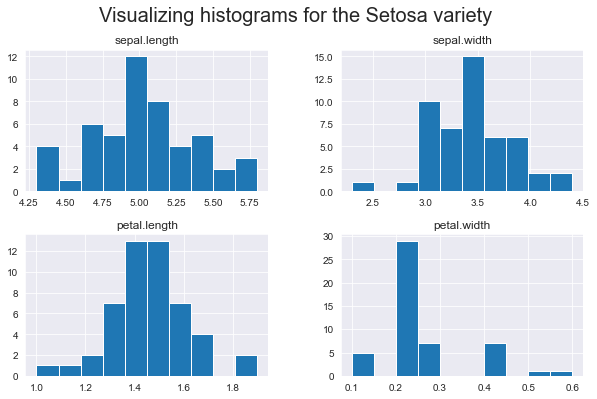

In [14]:
plot_variety_hist('Setosa')

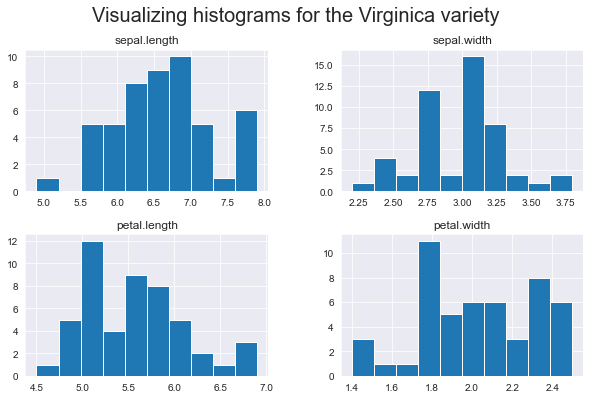

In [15]:
plot_variety_hist('Virginica')

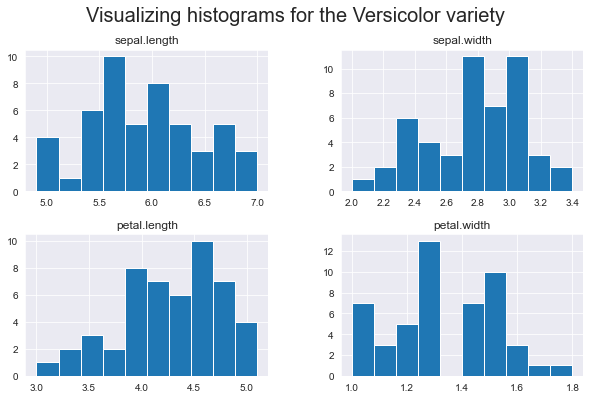

In [16]:
plot_variety_hist('Versicolor')

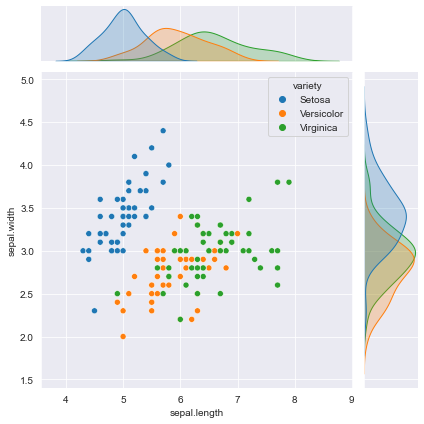

In [17]:
#using a seaborns jointplot for bivariate scatterplots and univariate histograms
sns.jointplot(x='sepal.length' , y= iris['sepal.width'], data=iris , hue='variety' , kind='scatter');

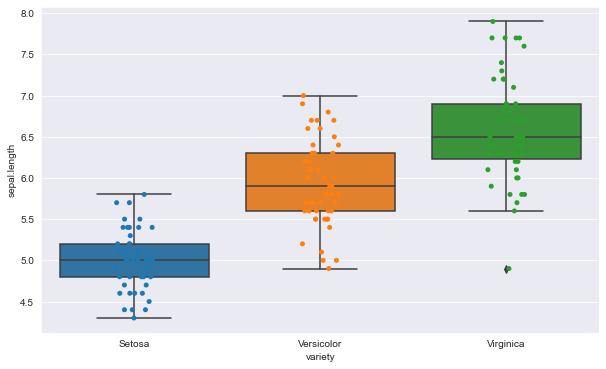

In [18]:
sns.boxplot('variety' , 'sepal.length' , data=iris)
sns.stripplot('variety' , 'sepal.length' , data=iris);

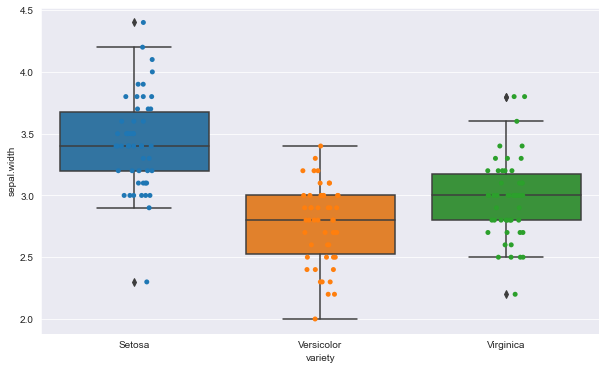

In [19]:
sns.boxplot('variety' , 'sepal.width' , data=iris)
sns.stripplot('variety' , 'sepal.width' , data=iris);

From the above plot, we can place the following observations for the sepal of each species:
* Virginica has more longer sepal length of all species with Setosa having the shortest
* Setosa has more sepal width than the rest

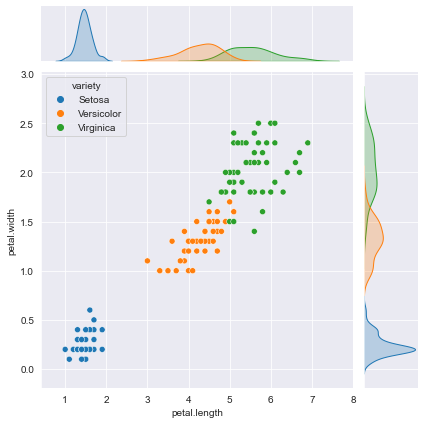

In [20]:
sns.jointplot(x='petal.length',y='petal.width', data=iris , hue='variety');

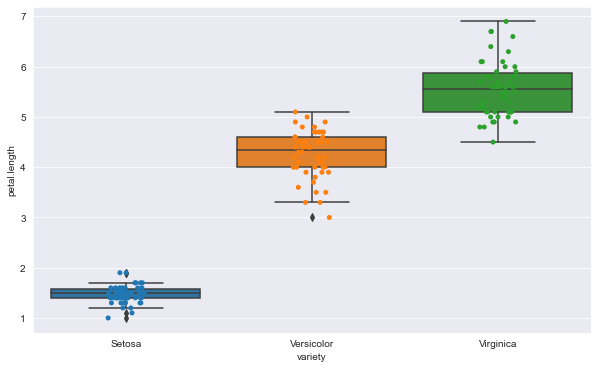

In [21]:
sns.boxplot('variety' ,'petal.length' , data=iris)
sns.stripplot('variety','petal.length' , data=iris);

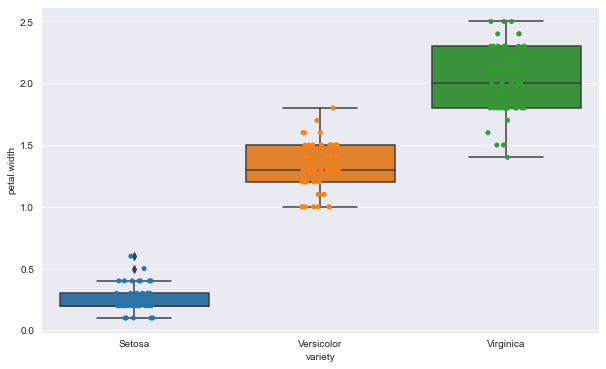

In [22]:
sns.boxplot('variety' ,'petal.width' , data=iris)
sns.stripplot('variety','petal.width' , data=iris);

* The setosa iris variety is seen to have shorter length amd width
* Viriginica on the other hand has more petal width and length

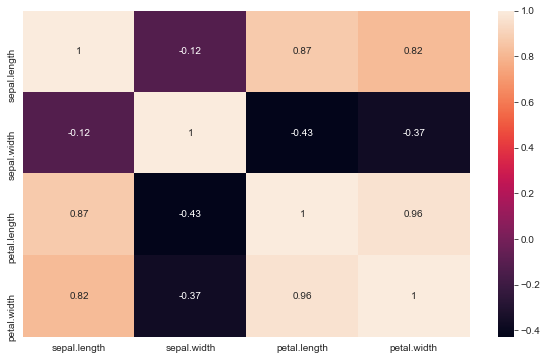

In [23]:
#Checking correlations between the features of the iris dataset

iris_corr_mat = iris.corr()
sns.heatmap(iris_corr_mat , annot=True );

Seems like statistically, there is a strong relationship between the petal.length and petal.width, also the relationship between the sepal length with petal.length and petal.width is worth looking into

In [24]:
iris.groupby('variety')[['petal.length','petal.width']].mean()

,petal.length,petal.width
variety,,
Setosa,1.462,0.246
Versicolor,4.260,1.326
Virginica,5.552,2.026


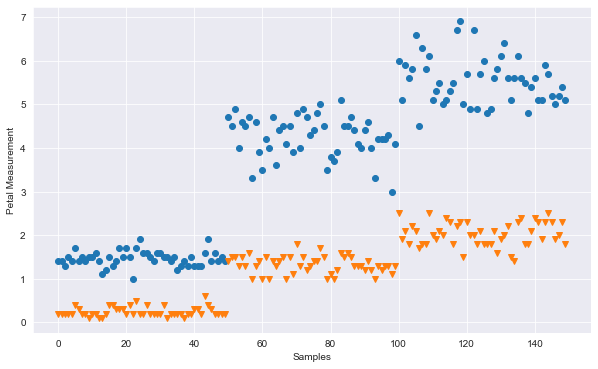

In [25]:
plt.plot('petal.length' , 'o' , data=iris)
plt.plot('petal.width', 'v' , data=iris)
plt.ylabel('Petal Measurement')
plt.xlabel('Samples');

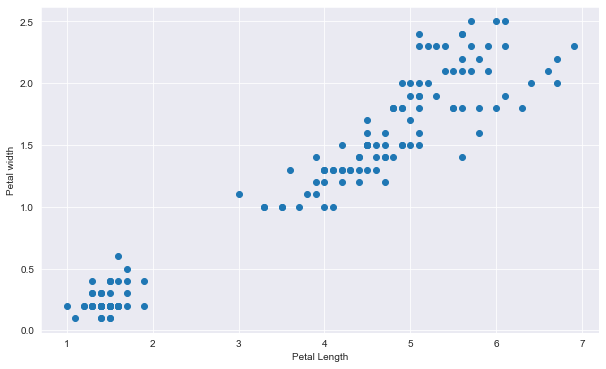

In [26]:
plt.scatter('petal.length' ,'petal.width', data=iris )
plt.xlabel('Petal Length')
plt.ylabel('Petal width');

This shows that there is a linear relationship between the petal.length and petal.width features

# Modelling

In [27]:
#splitting data into features and target
features = iris.drop('variety' , axis=1) 
target = iris['variety'].values

In [28]:
features.shape , target.shape

((150, 4), (150,))

In [29]:
#numerical representation of the classes of the target column 
# def transform(x):
#     if x == 'Setosa':
#         return 1
#     elif x == 'Versicolor':
#         return 2
#     else:
#         return 3
# iris['variety'].apply(lambda x : transform(x))
target = pd.Series([1 if specie == 'Setosa' else 2 if specie == 'Versicolor' else 3 for specie in iris['variety']])

In [86]:
#splitting the datasets
X_trainval , X_test ,y_trainval , y_test = train_test_split(features.values , target , test_size=0.20 , random_state=0 )
X_trainval.shape , X_test.shape

((120, 4), (30, 4))

### Baseline modelling with KNeighborsClassifier

In [31]:
kclf = KNeighborsClassifier()
kclf.fit(X_trainval , y_trainval)

#training on the full training set and generalizing on the test set
print('Score on the training set {:.2f}'.format(kclf.score(X_trainval , y_trainval)))
print('Score on the test set {:.2f}'.format(kclf.score(X_test , y_test)))

Score on the training set 0.95
Score on the test set 0.97


The score on the test is 100% accurate , this is seen as a sign of the model overfitting the data.
Performing some parameter tunning on the classifier to reduce this effect. We split the data to have a validation set

In [32]:
#creating validation splits
X_train , X_val , y_train , y_val = train_test_split(X_trainval , y_trainval , random_state=0)

In [33]:
X_train.shape , X_val.shape , X_test.shape , X_trainval.shape

((90, 4), (30, 4), (30, 4), (120, 4))

In [159]:
#varying the number of neighbors in the classifier
for neighbors in [1,3,4,9,10 ,12, 15]:
    kmodel = KNeighborsClassifier(n_neighbors=neighbors)
    kmodel.fit(X_train , y_train)
    print('Validation scores {:.2f} for {} neighbor(s)'.format(kmodel.score(X_val , y_val),neighbors))

kmodel = KNeighborsClassifier(n_neighbors=3).fit(X_trainval ,y_trainval)
print('Evaluating score on test set {:.2f}'.format(kmodel.score(X_test ,y_test)))

Validation scores 0.90 for 1 neighbor(s)
Validation scores 0.90 for 3 neighbor(s)
Validation scores 0.90 for 4 neighbor(s)
Validation scores 0.90 for 9 neighbor(s)
Validation scores 0.90 for 10 neighbor(s)
Validation scores 0.90 for 12 neighbor(s)
Validation scores 0.90 for 15 neighbor(s)
Evaluating score on test set 0.97


The classifier is still overfitting on the test set.

Using cross validation to split the dataset

In [96]:
kfold = KFold(n_splits=3 , shuffle=True , random_state=0)

scores_acc = cross_val_score(kclf , features , target ,  cv=kfold , verbose=True)
knn_score = scores_acc.mean()
print('Scores: {}'.format(scores))
print('Cross Validated score {:.2f}'.format(knn_score))

Scores: [0.98 0.96 0.96]
Cross Validated score 0.97


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s finished


In [166]:
def metric_eval(metric):
    return np.mean(cross_val_score(kclf , features.values , target.values , cv=kfold , scoring=metric ,n_jobs=-1))

In [173]:
score_precision = metric_eval('precision')
score_recall = metric_eval('recall')
score_f1 = metric_eval('f1')

The KNeighbours classifier appears to generalize well when cross validation was used. Will go ahead to make use of other models

## Support Vector Machines

In [36]:
svc = SVC()
#fitting training set into model
svc.fit(X_train , y_train)
print('Score on the validation set {:.2f}'.format(svc.score(X_val , y_val)))

Score on the validation set 0.90


The model pretty much does well on the validation set. Lets see if we can tune the parameters a bit to boost model accuracy

### Hyperparamter tunning for SVC model

In [110]:
#setting svc model parameters
params = [
    {
        'kernel':['rbf'],
        'gamma': [0.001, 0.01, 0.1, 1, 10, 100],
        'C': [0.001, 0.01, 0.1, 1, 10, 100]
    },
    {
        'kernel':['linear'],
        'C': [0.001, 0.01, 0.1, 1, 10, 100]
    }
]

In [111]:
gs_svc = GridSearchCV(SVC(), param_grid = params , cv=5 , verbose=True)
gs_svc.fit(X_trainval , y_trainval)
gs_preds = gs_svc.predict(X_test)

Fitting 5 folds for each of 42 candidates, totalling 210 fits


In [112]:
pd.DataFrame(gs_svc.cv_results_).loc[: , ['params' , 'mean_test_score']]

,params,mean_test_score
0,"{'C': 0.001, 'gamma': 0.001, 'kernel': 'rbf'}",0.366667
1,"{'C': 0.001, 'gamma': 0.01, 'kernel': 'rbf'}",0.366667
2,"{'C': 0.001, 'gamma': 0.1, 'kernel': 'rbf'}",0.366667
3,"{'C': 0.001, 'gamma': 1, 'kernel': 'rbf'}",0.366667
4,"{'C': 0.001, 'gamma': 10, 'kernel': 'rbf'}",0.366667
5,"{'C': 0.001, 'gamma': 100, 'kernel': 'rbf'}",0.366667
6,"{'C': 0.01, 'gamma': 0.001, 'kernel': 'rbf'}",0.366667
7,"{'C': 0.01, 'gamma': 0.01, 'kernel': 'rbf'}",0.366667
8,"{'C': 0.01, 'gamma': 0.1, 'kernel': 'rbf'}",0.366667
9,"{'C': 0.01, 'gamma': 1, 'kernel': 'rbf'}",0.366667


In [113]:
print('Gridsearched best params {}'.format(gs_svc.best_params_))
print('GridSearched SVC model best score {:.2f}'.format(gs_svc.best_score_))

Gridsearched best params {'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}
GridSearched SVC model best score 0.96


In [117]:
#evaluating model on test set
svc_acc_score  = accuracy_score(y_test , gs_preds)
print('SVC score on test set {:.2f}'.format(svc_acc_score))

SVC score on test set 1.00


In [121]:
svc_precision = np.mean(precision_score(y_test , gs_preds , average=None))
svc_recall = np.mean(recall_score(y_test , gs_preds , average=None))
svc_f1 = np.mean(f1_score(y_test , gs_preds , average=None))

# Logistic Regression

In [61]:
log_reg = LogisticRegression()
log_reg.fit(X_train , y_train)
print('Training set accuracy {:.2f}'.format(log_reg.score(X_train , y_train)))
print('Test set accuracy {:.2f}'.format(log_reg.score(X_val , y_val)))

Training set accuracy 0.98
Test set accuracy 0.90


The model seems to do a bit poorly on the validation set. Lets vary the value of the C parameter.

In [64]:
best_score = 0
for c in np.arange(0 , 100 , 10):
    log_reg = LogisticRegression(C=c)
    log_reg.fit(X_train , y_train)
    score = log_reg.score(X_val ,y_val)
    
    if score > best_score:
        best_score = score
        best_params = {'C':c}
print('Best Parameter {}'.format(best_params))
log_reg = LogisticRegression(**best_params)
log_reg.fit(X_trainval , y_trainval)
log_reg_preds = log_reg.predict(X_test)
print('Best validaton score {:.2f}'.format(best_score))
print('Best score on test set {}'.format(log_reg.score(X_test , y_test)))

Best Parameter {'C': 10}
Best validaton score 0.93
Best score on test set 1.0


In [136]:
logreg_accuracy = accuracy_score(y_test , log_reg_preds)
logreg_precision = np.mean(precision_score(y_test , log_reg_preds , average=None))
logreg_recall = np.mean(recall_score(y_test , log_reg_preds , average=None))
logreg_f1 = np.mean(f1_score(y_test , log_reg_preds , average=None))

## Decision Tree CLassifier

In [45]:
tree = DecisionTreeClassifier()
tree.fit(X_train , y_train)
print(tree.score(X_val , y_val))

0.8666666666666667


In [146]:
params = {
    'max_depth':[2,4,6,8],
    'min_samples_leaf':[1,2,3,4,5,6]
}

In [147]:
gs_tree = GridSearchCV(tree , param_grid=params , cv=5 , verbose=True , n_jobs=-1)

In [148]:
gs_tree.fit(X_trainval , y_trainval)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'max_depth': [2, 4, 6, 8],
                         'min_samples_leaf': [1, 2, 3, 4, 5, 6]},
             verbose=True)

In [149]:
tree_score = gs_tree.score(X_test , y_test)
tree_preds = gs_tree.predict(X_test)
print('Test set accuracy {:.2f}'.format(tree_score))

Test set accuracy 0.97


In [150]:
tree_precision = np.mean(precision_score(y_test , tree_preds , average=None))
tree_recall = np.mean(recall_score(y_test , tree_preds , average=None))
tree_f1 = np.mean(f1_score(y_test , tree_preds , average=None))

## Metrics for various classifiers

In [141]:
pd.DataFrame(
    {
        'Accuracy':[svc_acc_score , logreg_accuracy , tree_score],
        'Precision':[svc_precision, logreg_precision , tree_precision],
        'Recall':[svc_recall , logreg_recall , tree_recall],
        'f1':[svc_f1 , logreg_f1 , tree_f1]
    },
    index = ['SVC','Log_Regression','Decision_tree']
)

,Accuracy,Precision,Recall,f1
SVC,1.000000,1.00000,1.000000,1.000000
Log_Regression,1.000000,1.00000,1.000000,1.000000
Decision_tree,0.966667,0.97619,0.944444,0.957351


The perfect score for the the SVC and logisitic regression is due to the fact the model overfits the dataset due to the small size of the dataset